In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
import pickle
ana = pickle.load(open('final_feature_analysis.pkl', 'rb'))
ana = ana[ana['Food']!='Tomato Juice']
ana = ana.dropna()

In [54]:
df = ana.drop(columns = ['Food', 'Z_R', 'Z_no_R', 'PA_R', 'PA_no_R', 'diff'])
df = df.dropna()
target = ana['Z_R']
target

0        222.783
1        221.639
2        220.898
3        220.411
4        220.418
          ...   
7690    4546.920
7691    4993.480
7692    4993.480
7693    5574.320
7694    5574.320
Name: Z_R, Length: 7290, dtype: float64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)
X_train

,Freq(Hz),Time(m),Fat,Cholesterol,Sodium,Potassium,Total carbohydrate,Protein,pH,ORP,Conductivity (100H),Conductivity (400H),Conductivity (10kH),Conductivity (100kH),DO (ppm),L,a*,b*
7529,11.3230,20,0.014583,0.000000,0.000333,0.0,0.037500,0.029167,7.786364,-65.218182,0.007467,0.004288,0.003671,0.003367,0.0452,240.788903,258.445183,173.706981
5411,54.5476,5,0.002083,0.000021,0.004000,0.0,0.004167,0.004167,6.252818,20.890909,0.012880,0.014026,0.015116,0.016148,8.5634,223.665082,263.627247,179.289135
325,89134.1000,20,0.333333,0.001333,0.000667,0.0,0.066667,0.066667,6.508909,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185
3717,24.9911,0,0.000000,0.000000,0.000146,0.0,0.166667,0.000000,2.734364,232.900000,0.005823,0.003112,0.002694,0.002508,8.4654,178.507907,202.614262,212.304132
290,446.6140,15,0.333333,0.001333,0.000667,0.0,0.066667,0.066667,6.508909,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5596,44681.0000,20,0.002083,0.000021,0.004000,0.0,0.004167,0.004167,6.252818,20.890909,0.012880,0.014026,0.015116,0.016148,8.5634,223.665082,263.627247,179.289135
5631,794.1630,20,0.002083,0.000021,0.004000,0.0,0.004167,0.004167,6.252818,20.890909,0.012880,0.014026,0.015116,0.016148,8.5634,223.665082,263.627247,179.289135
5795,79.4083,0,0.000000,0.000000,0.003708,0.0,0.004167,0.008333,4.949000,100.990909,0.015032,0.014518,0.015453,0.016429,0.8600,230.560107,274.377236,205.565699
860,316.1130,0,0.010000,0.000060,0.000545,0.0,0.054542,0.038375,6.475818,11.236364,0.011754,0.006763,0.005764,0.005332,0.1577,239.962692,258.751532,172.176335


In [56]:
# model = LinearRegression()
# model.fit(X_train, y_train)

In [57]:
# y_pred = model.predict(X_test)
# print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
# print('R-squared:', r2_score(y_test, y_pred))


In [58]:
# Analyze feature importance
# importance = model.coef_
feature_names = df.columns
# feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False)
# print('Feature Importance:\n', feature_importance)

# Plot feature importance
# plt.barh(feature_importance.index, feature_importance.values)
# plt.xlabel('Importance')
# plt.ylabel('Feature')
# plt.title('Feature Importance for Z')
# plt.show()

In [59]:
from sklearn.ensemble import RandomForestRegressor

# Train a random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Mean Squared Error (RF): 439.5115395240939
R-squared (RF): 0.9996975393559967
Random Forest Feature Importance:
 Freq(Hz)                0.968534
Conductivity (100H)     0.007231
b*                      0.004482
L                       0.003875
a*                      0.002627
Sodium                  0.002296
ORP                     0.002260
pH                      0.001945
Conductivity (100kH)    0.001381
Conductivity (10kH)     0.001276
DO (ppm)                0.001154
Conductivity (400H)     0.001075
Fat                     0.000663
Total carbohydrate      0.000458
Cholesterol             0.000261
Protein                 0.000212
Time(m)                 0.000208
Potassium               0.000062
dtype: float64


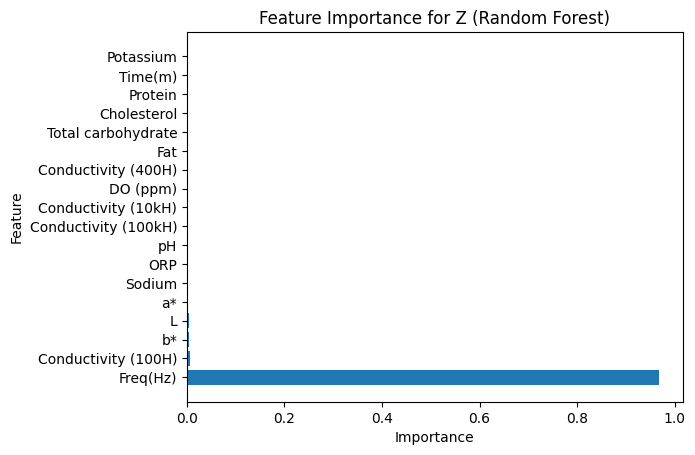

In [60]:
y_rf_pred = rf_model.predict(X_test)
print('Mean Squared Error (RF):', mean_squared_error(y_test, y_rf_pred))
print('R-squared (RF):', r2_score(y_test, y_rf_pred))

# Analyze feature importance
rf_importance = rf_model.feature_importances_
rf_feature_importance = pd.Series(rf_importance, index=feature_names).sort_values(ascending=False)
print('Random Forest Feature Importance:\n', rf_feature_importance)

# Plot feature importance
plt.barh(rf_feature_importance.index, rf_feature_importance.values)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Z (Random Forest)')
plt.show()

Mean Squared Error (GB): 1148.784311041793
R-squared (GB): 0.9992094359048803
Gradient Boosting Feature Importance:
 Freq(Hz)                0.970964
Conductivity (100H)     0.006273
L                       0.004892
ORP                     0.003495
b*                      0.003434
Conductivity (10kH)     0.002153
a*                      0.001890
pH                      0.001652
Conductivity (400H)     0.001092
Conductivity (100kH)    0.000907
Cholesterol             0.000890
Fat                     0.000789
Sodium                  0.000708
Protein                 0.000492
Total carbohydrate      0.000279
DO (ppm)                0.000039
Time(m)                 0.000026
Potassium               0.000025
dtype: float64


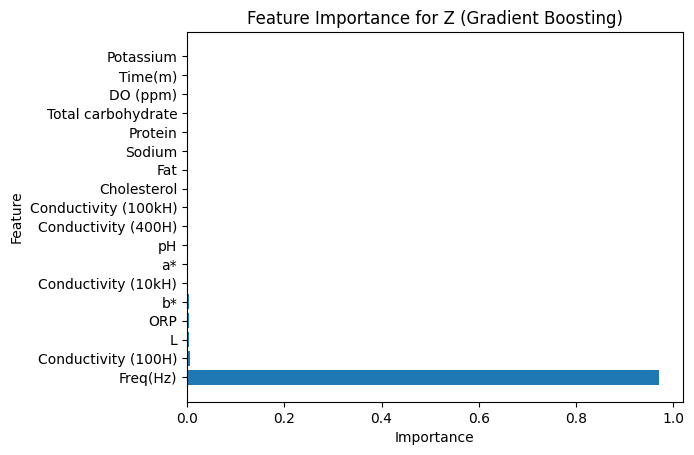

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a gradient boosting regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_gb_pred = gb_model.predict(X_test)
print('Mean Squared Error (GB):', mean_squared_error(y_test, y_gb_pred))
print('R-squared (GB):', r2_score(y_test, y_gb_pred))

# Analyze feature importance
gb_importance = gb_model.feature_importances_
gb_feature_importance = pd.Series(gb_importance, index=feature_names).sort_values(ascending=False)
print('Gradient Boosting Feature Importance:\n', gb_feature_importance)

# Plot feature importance
plt.barh(gb_feature_importance.index, gb_feature_importance.values)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Z (Gradient Boosting)')
plt.show()


In [19]:
# MIXED DATA ANALYSIS

Mean Squared Error: 2544222769.705534
R-squared: 0.003953496116333222


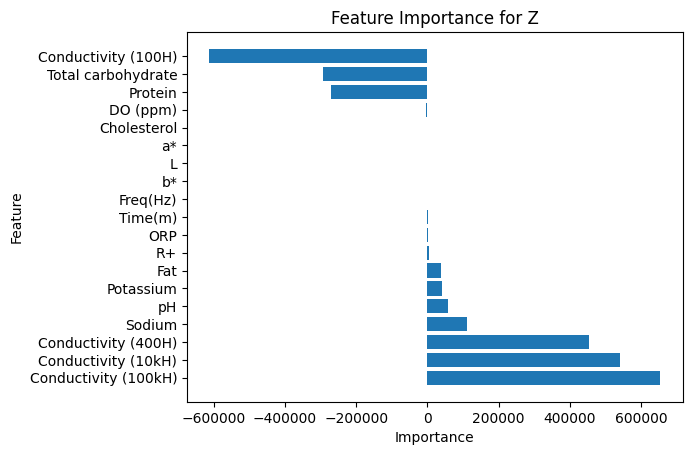

In [73]:
X_train, X_test, y_train, y_test = train_test_split(dfricin, target, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))
# Analyze feature importance
importance = model.coef_
feature_names = dfricin.columns
feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False)
# print('Feature Importance:\n', feature_importance)

# Plot feature importance
plt.barh(feature_importance.index, feature_importance.values)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Z')
plt.show()

In [62]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(dfricin, target, test_size=0.2, random_state=42)
# Train a random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=24)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)
print('Mean Squared Error (RF):', mean_squared_error(y_test, y_rf_pred))
print('R-squared (RF):', r2_score(y_test, y_rf_pred))

# Analyze feature importance
rf_importance = rf_model.feature_importances_
rf_feature_importance = pd.Series(rf_importance, index=feature_names).sort_values(ascending=False)
print('Random Forest Feature Importance:\n', rf_feature_importance)

# Plot feature importance
plt.barh(rf_feature_importance.index, rf_feature_importance.values)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Z (Random Forest)')
plt.show()

NameError: name 'dfricin' is not defined

Mean Squared Error (GB): 2279.5673666940147
R-squared (GB): 0.9985315390831592
Gradient Boosting Feature Importance:
 Freq(Hz)                0.970344
a*                      0.008635
Cholesterol             0.003979
Conductivity (10kH)     0.002600
ORP                     0.002331
Conductivity (100H)     0.002306
DO (ppm)                0.001323
Conductivity (400H)     0.001259
Conductivity (100kH)    0.001205
Protein                 0.001106
b*                      0.001098
Total carbohydrate      0.001022
Fat                     0.000982
Sodium                  0.000728
L                       0.000565
Potassium               0.000361
Time(m)                 0.000088
pH                      0.000069
dtype: float64


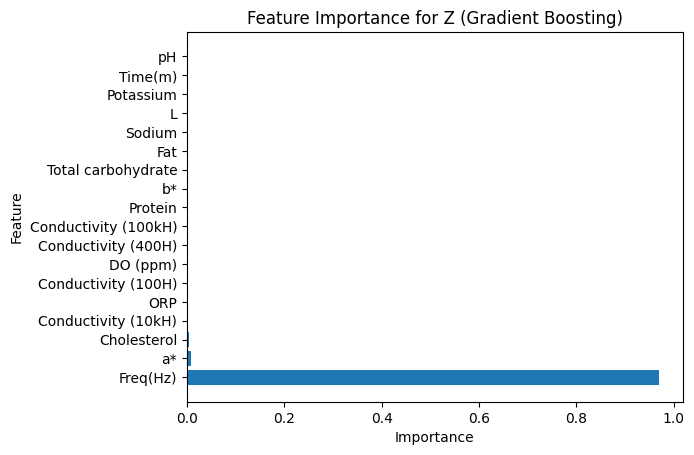

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a gradient boosting regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_gb_pred = gb_model.predict(X_test)
print('Mean Squared Error (GB):', mean_squared_error(y_test, y_gb_pred))
print('R-squared (GB):', r2_score(y_test, y_gb_pred))

# Analyze feature importance
gb_importance = gb_model.feature_importances_
gb_feature_importance = pd.Series(gb_importance, index=feature_names).sort_values(ascending=False)
print('Gradient Boosting Feature Importance:\n', gb_feature_importance)

# Plot feature importance
plt.barh(gb_feature_importance.index, gb_feature_importance.values)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Z (Gradient Boosting)')
plt.show()

In [78]:
dfricin



,Freq(Hz),Time(m),R+,Fat,Cholesterol,Sodium,Potassium,Total carbohydrate,Protein,pH,ORP,Conductivity (100H),Conductivity (400H),Conductivity (10kH),Conductivity (100kH),DO (ppm),L,a*,b*
0,7942.6000,10,0,0.000000,0.000000,0.002833,0.001792,0.041667,0.008333,3.895727,160.009091,0.013739,0.013886,0.015148,0.016696,1.4368,234.183923,272.718313,156.593038
1,501.3030,5,0,0.166667,0.000677,0.000604,0.000000,0.060417,0.052083,6.378364,16.772727,0.009854,0.004729,0.004008,0.003712,0.0719,240.821411,258.859595,168.355434
2,22.2195,20,0,0.000000,0.000000,0.000146,0.000000,0.166667,0.000000,2.734364,232.900000,0.005823,0.003112,0.002694,0.002508,8.4654,178.507907,202.614262,212.304132
3,5011.1800,10,1,0.010000,0.000060,0.000545,0.000000,0.054542,0.038375,6.475818,11.236364,0.011754,0.006763,0.005764,0.005332,0.1577,239.962692,258.751532,172.176335
4,46.1675,10,0,0.010753,0.000027,0.000175,0.000000,0.021505,0.045699,3.931636,161.754546,0.009790,0.004976,0.004177,0.003832,8.1096,240.825800,258.958375,166.317035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9653,501.3030,15,0,0.000000,0.000000,0.000146,0.000125,0.137500,0.000000,2.556636,248.700000,0.000071,0.001018,0.001108,0.001176,3.8798,208.343231,296.677537,232.743793
9654,446.6140,5,0,0.166667,0.000677,0.000604,0.000000,0.060417,0.052083,6.378364,16.772727,0.009854,0.004729,0.004008,0.003712,0.0719,240.821411,258.859595,168.355434
9655,63.0971,0,1,0.000000,0.000000,0.000000,0.001875,0.108333,0.008333,3.864000,173.009091,0.005942,0.005143,0.004614,0.004308,6.9435,240.836788,259.001589,166.245857
9656,794.1630,0,0,0.034000,0.000155,0.000554,0.000000,0.055442,0.040475,6.503000,9.836364,0.011899,0.006479,0.005472,0.005059,0.0791,240.801607,258.556618,172.003756
